## 1. AlexNet

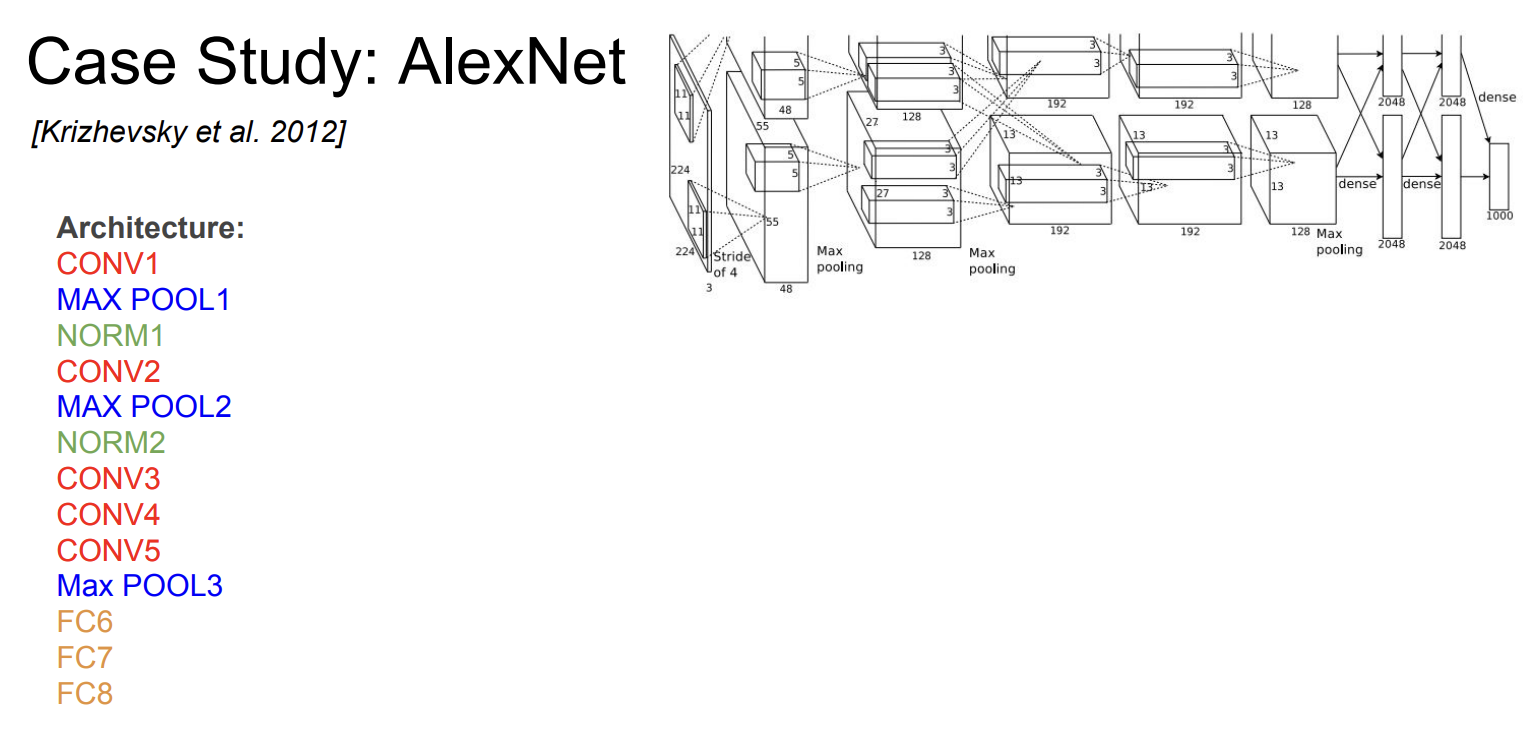

* 최초의 large scale의 CNN  
* 2012년 ImageNet Challenge의 winner  
* 딥러닝의 부흥을 일으킨 모델  
* 다양한 task의 transfer learning에 많이 사용되어 옴  
* conv-pool-norm 구조가 두번 반복됨  
* 5개의 conv layer와 2개의 FC layer  
* input 이미지의 크기는 227x227x3  
* 첫번째 layer의 출력 사이즈: 55x55x96(width x height x 필터의 개수)  
* parameter의 수: (11 * 11 * 3) * 96 = 35K개  
* 두번째 layer의 출력 사이즈: 27x27x96(depth의 크기는 변하지 않음)  
* pooling layer인 두번째 layer에 parameter는 없음  

**Details/restropectives**  
* 처음으로 ReLU를 사용  
* Data augmentation을 엄청 함  
* dropout 0.5  
* batchsize는 128  
* SGD momentum은 0.9  
* L2 weight decay  
* 마지막에는 모델 앙상블로 성능을 향상시킴  

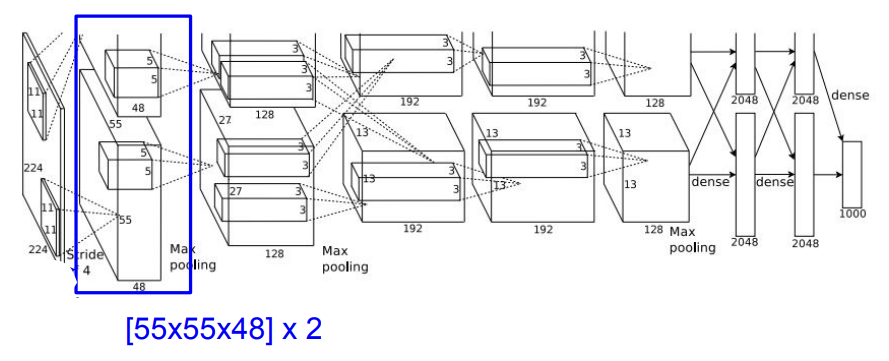

다른 Conv Net과의 차이점 -> 모델이 두 개로 나눠져서 서로 교차함  
* GTX 580 GPU로 학습시켜서 네트워크를 GPU에 분산시켜 넣음  
* 각 GPU가 모델의 뉴런과 Feature map을 반반씩 나눠가짐  
* Feature map을 반반씩 나눠가져서 각 GPU에서의 depth는 48  

### + ZFNet  
* AlexNet의 하이퍼파라미터를 개선한 모델  
* 2013년 ImageNet Challenge winner  

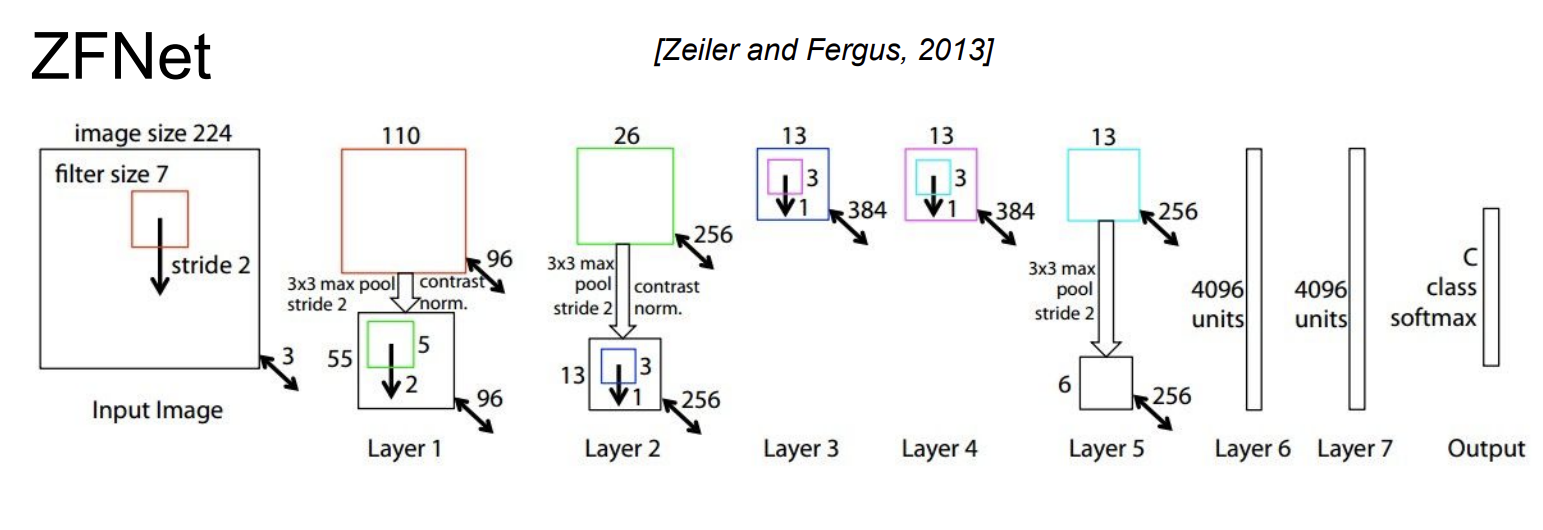

* AlexNet과 레이어의 수와 기본적인 구조는 같음  
* 다만 stride size, 필터의 수와 같은 하이퍼파리미터를 조절해서 성능을 더 개선함  

## 2. VGG
* 2014년 ILSVRC classification에서 2등하고, localization에서 1등한 모델  
* 학습과정은 AlexNet과 유사함  
* 네트워크가 훨씬 더 깊어졌고, 더 작은 필터를 이용함  
* 작은 필터를 사용한 이유  
: 필터의 크기가 작으면 파라미터의 수가 더 적음. 따라서 큰 필터에 비해 레이어를 더 많이 쌓을 수 있음. 즉 depth를 더 크게 하기 위해  
* 필터가 한 번에 볼 수 있는 입력의 spatial area인 receptive field가 7x7 필터와 동일하면서 더 깊은 레이어를 쌓을 수 있음  

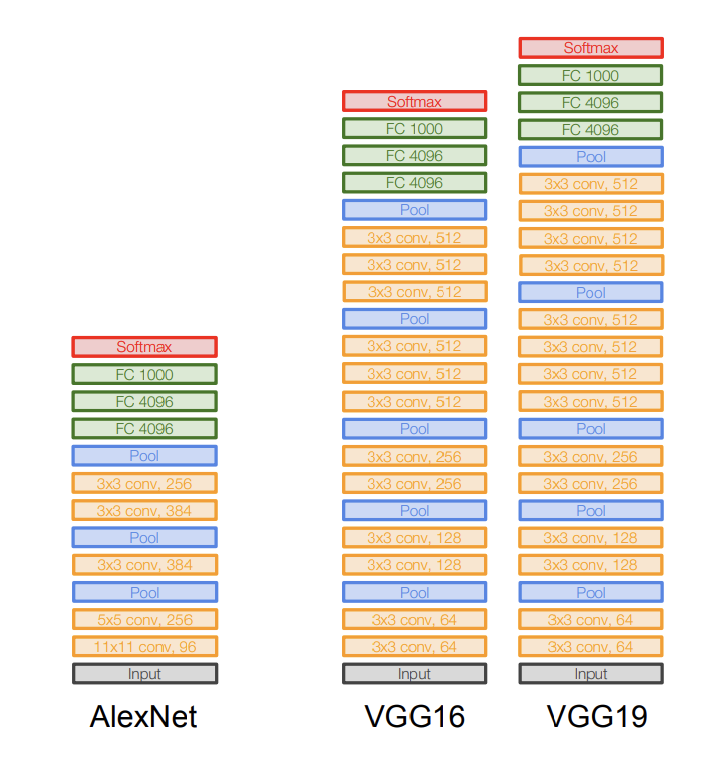

* 네트워크가 깊다는 것은 학습 가능한 가중치를 가진 레이어의 개수가 많다는 것을 의미  
* VGG에서 네트워크가 깊어짐으로써 non-linearity를 가지고 파라미터의 수도 적어짐  

**Details**  
* Local Response Normalization 사용 안 함  
* 성능 향상을 위해 앙상블 기법 사용  
* VGG19가 메모리를 조금 더 쓰지만 성능이 좀 더 좋음  
* 보통 VGG16을 더 많이 사용함  

## 3. GoogLeNet
* 2014년 classification challege에서 우승한 모델  
* 네트워크가 훨씬 더 깊어지고, 계산 효율성이 증가함  
* 22 layers  
* inception mlodule을 여러 개 쌓아서 만듦  
* 파라미터의 수를 줄이기 위해 FC layer가 없음  
* 5M개의 parameter(AlexNet의 파라미터 개수는 60M개)  

**Inception module** : network within a network라는 개념으로 local network topology를 구현함  

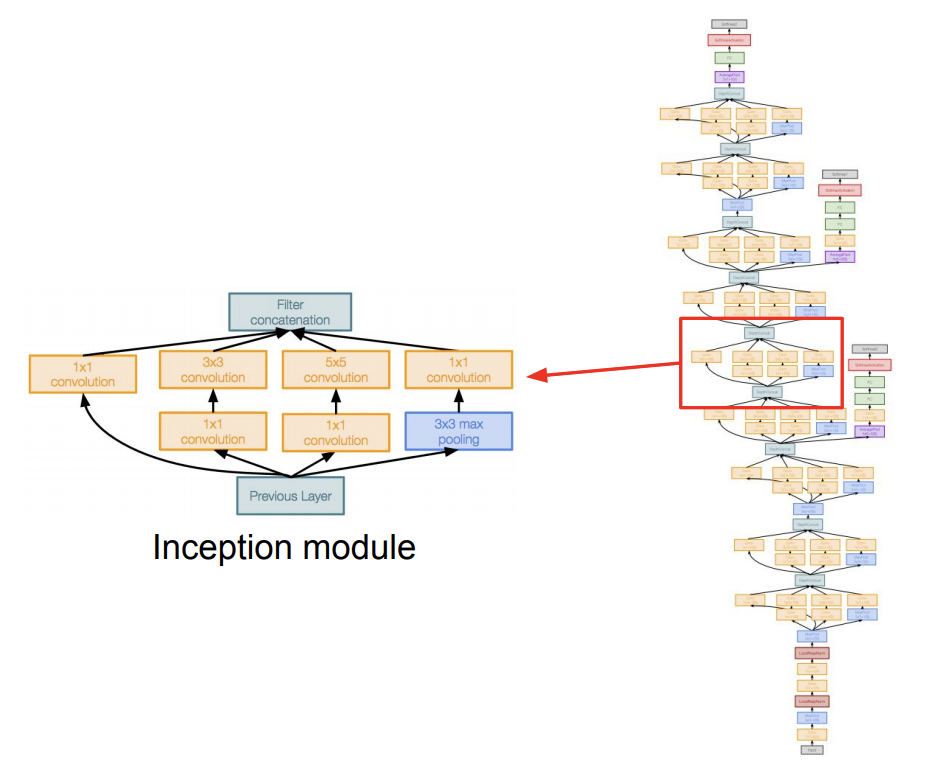

* 각각의 local network가 inception module  
* inception module 내부에는 동일한 입력을 받는 서로 다른 다양한 필터들이 "병렬"적으로 존재  
* 다양한 연산을 수행하고 이를 하나로 합치는 아주 단순한 방식은 문제가 있음  
1. 계산 비용의 문제. 연산량이 매우 많음  
2. pooling layer에서 입력의 depth를 그대로 유지하기 때문에 레이어를 거칠 때마다 depth가 점점 늘어남  
=> solution으로 "bottleneck layer"를 이용!  
**bottleneck layer**  
* conv 연산을 수행하기에 앞서 입력을 더 낮은 차원으로 보냄  
* 입력의 depth를 더 낮은 차원으로 projection 함  
* input feature map들 간의 선형결합(linear combination)이라고 할 수 있음  

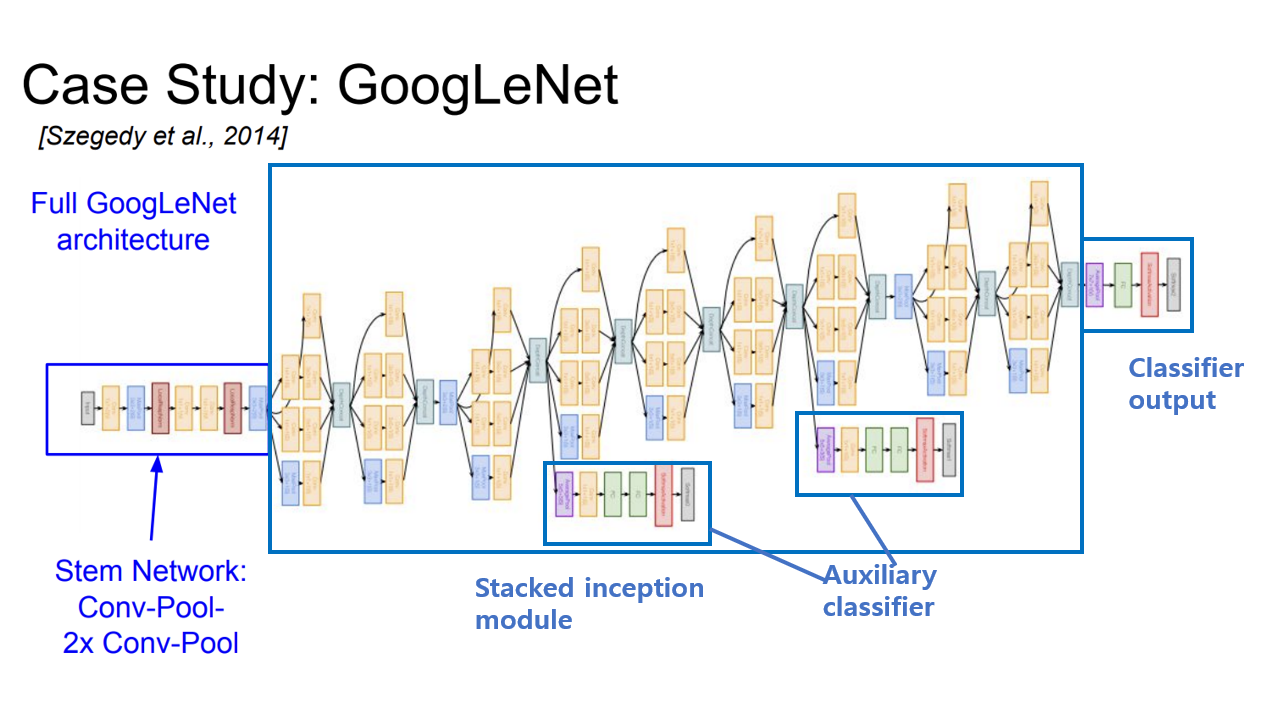

* 앞단은 conv-pool-conv-pool의 일반적인 네트워크 구조  
* 보조 분류기(auxiliary classifier)인 미니 네트워크에서도 train set의 loss(softmax)를 계산함. 네트워크가 깊기 때문  
* 각 inception module은 1x1/3x3/5x5 conv layer를 병렬적으로 가지고 있음  
* 가중치를 가진 레이어는 총 22개  

## 4. ResNet
* residual connection 방법을 사용하여 네트워크가 더 깊어짐  

VGG에 conv-pool 레이어를 깊게만 쌓는다고 성능이 좋아지는 것은 아님  

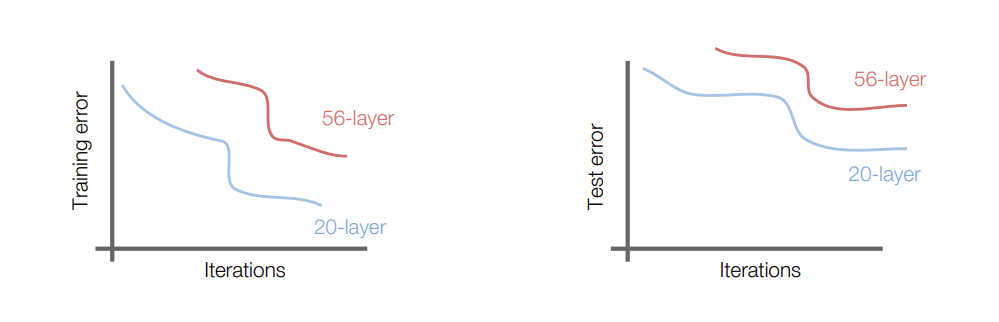

* 위 그래프와 같이 평범한 CNN 둘 중에 56-layer의 test error가 더 좋지 않음  
* 56-layer의 training error도 더 안 좋음 -> 즉 test error가 안 좋은 것은 overfitting  때문이 아님  
위 결과를 보고 세울 수 있는 가설: 더 깊은 모델을 학습 시 optimization에 문제가 발생한다는 것, 모델이 깊어질수록 최적화가 더 어렵다는 가설을 세울 수 있음  

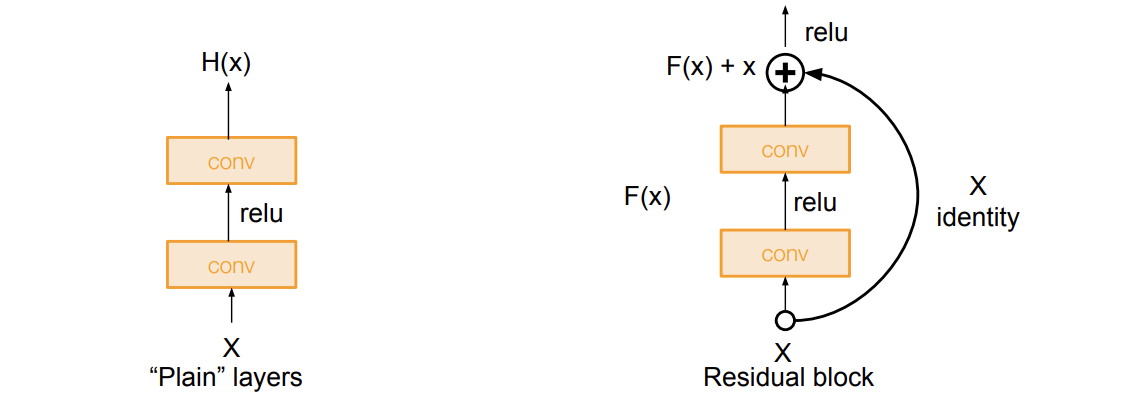

soulution: 더 얕은 모델의 가중치를 깊은 모델의 일부 레이어에 복사. 나머지 layer는 identity mapping(input을 그대로 ouput으로) -> shallow model의 성능만큼은 보장하도록!  
* 레이어를 단순하게 쌓는 direct mapping 대신 residual mapping하도록 블록을 쌓음  

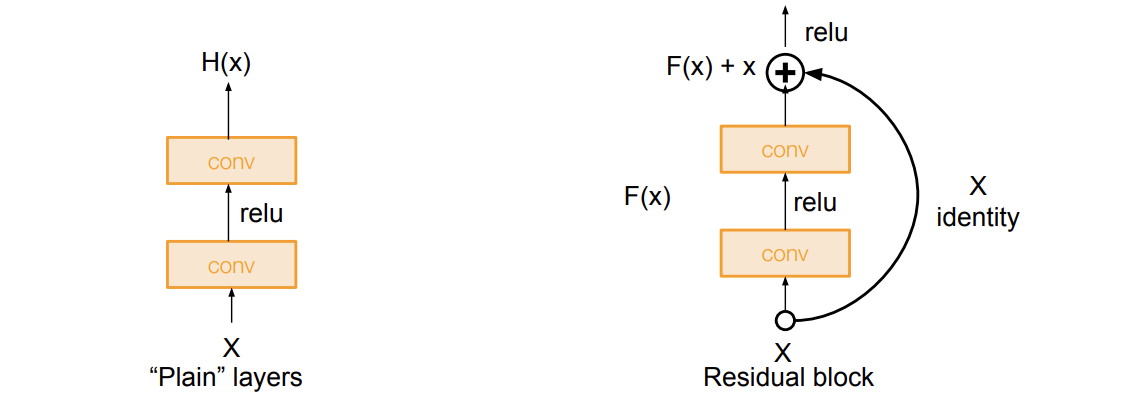

* H(x)를 바로 학습하기보다 H(x)-x를 학습하도록! -> 이를 위해 skip connection 도입!  
* 오른쪽 그림의 skip connection은 가중치가 없고, 입력은 identity mapping으로 그대로 output으로 내보냄  
* 최종 출력값인 H(x)=F(x)+x에서 x는 input이 되고, F(x)는 변화량(delta, residual)  
* 결국 네트워크는 residual만 학습하면 됨  
* ResNet은 이처럼 residual block들을 쌓아 올린 구조  

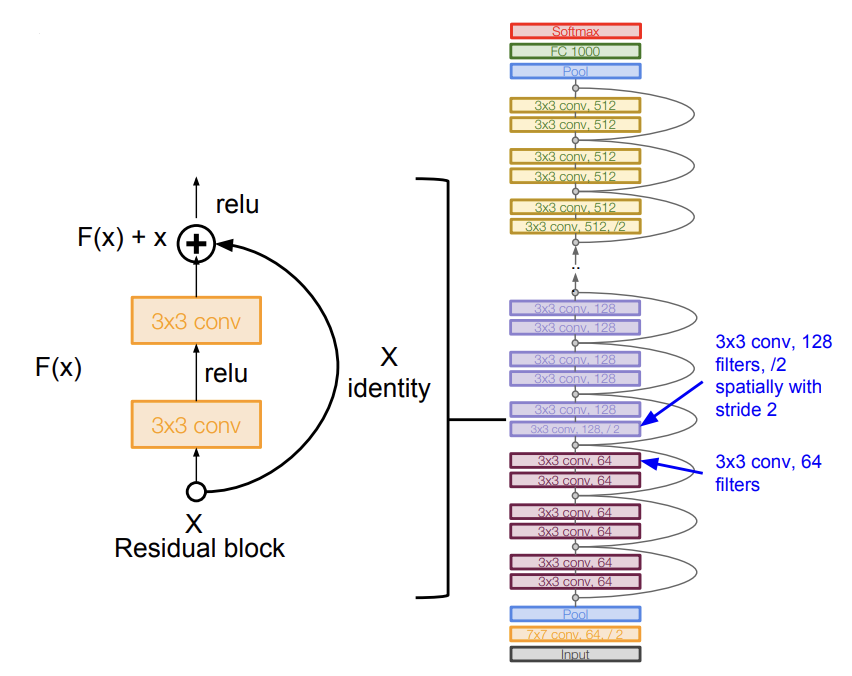

* 각각의 residual block은 두 개의 3x3 conv layer를 가지고 있음  
* 필터를 2배씩 늘리고 stride 2를 이용해서 downsampling을 수행  
* 네트워크 처음에 conv layer 있음  
* 끝에 FC layer 없음  
* ResNet에서 모델의 depth가 50 이상일 때 Bottleneck layer를 도입함  

**실전에서는...**  
* conv layer 뒤에 모두 batch normalization  
* xavier/2 초기값 이용  
* SGD + Momentum (0.9)  
* weight decay 적용  
* dropout은 사용하지 않음  

### 모델별 complexity

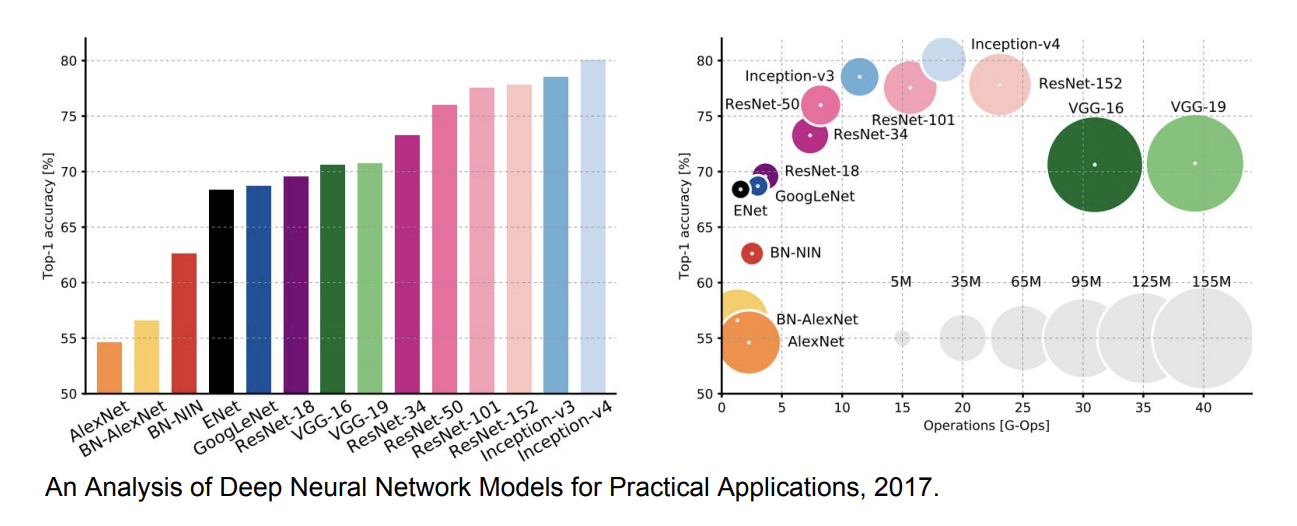

* 오른쪽 그래프에서 원의 크기는 메모리 사용량을 나타냄  
* VGG - 가장 효율성이 떨어짐. 메모리 사용량도 크고 연산량이 많음  
* AlexNet - 계산량이 작지만, 메모리 사용량이 크고 비효율적. 정확도도 낮은 편  
* ResNet - 메모리 사용량과 계산량은 중간 정도이지만 accuracy는 최상위  